## Limpieza de datos

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
df_docentes_ = pd.read_csv("https://drive.google.com/uc?id=1Lac0jmlthX1KloRqFZl0SNN-j7r7TFts", sep=None, engine='python')

In [9]:
df_docentes = df_docentes_[(df_docentes_['COD_REG_RBD']==13) & 
                (df_docentes_['ESTADO_ESTAB']==1) &
                (df_docentes_['DC_TOT']>0)
                ]
# Imprimir nombres de columnas para verificar el BOM
# Reemplazar el BOM en el nombre de la columna
df_docentes.columns = df_docentes.columns.str.replace('\ufeff', '', regex=False)
df_docentes.drop(columns=['ESTADO_ESTAB','NOM_REG_RBD_A','AGNO', 'COD_DEPROV_RBD', 'NOM_DEPROV_RBD','DGV_RBD','COD_REG_RBD','COD_PRO_RBD','COD_DEPE2','COD_DEPE','COD_COM_RBD'], inplace=True)
# AGNO SE PUEDE IR ES REDUNDANTE SI TODOS LOS DATOS LOS SACAMOS DEL 2023
# COD_DEPROV_RBD
# NOM_DEPROV_RBD
# Creo que no es necesario saber el departamento al que pertenecen

C:\Users\catit\AppData\Local\Temp\ipykernel_21192\2260780922.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_docentes.drop(columns=['ESTADO_ESTAB','NOM_REG_RBD_A','AGNO', 'COD_DEPROV_RBD', 'NOM_DEPROV_RBD','DGV_RBD','COD_REG_RBD','COD_PRO_RBD','COD_DEPE2','COD_DEPE','COD_COM_RBD'], inplace=True)


In [75]:
df_docentes.shape

(2978, 36)

In [77]:
df_docentes.dtypes 

RBD              int64
NOM_RBD         object
NOM_COM_RBD     object
RURAL_RBD        int64
DC_A             int64
HH_A             int64
DC_UTP           int64
HH_UTP           int64
DC_PDIR          int64
HH_PDIR          int64
DC_DIR           int64
HH_DIR           int64
DC_OES           int64
HH_OES           int64
DC_OF            int64
HH_OF            int64
DC_JUTP          int64
HH_JUTP          int64
DC_IG            int64
HH_IG            int64
DC_OR            int64
HH_OR            int64
DC_DIR_SOST      int64
HH_DIR_SOST      int64
DC_TP_SOST       int64
HH_TP_SOST       int64
DC_SUP_SOST      int64
HH_SUP_SOST      int64
DC_SUBDIR        int64
HH_SUBDIR        int64
DC_PROF_ENC      int64
HH_PROF_ENC      int64
DC_EDUC_TRAD     int64
HH_EDUC_TRAD     int64
DC_TOT           int64
HH_TOT           int64
dtype: object

In [79]:
df_docentes.isnull().sum()  # Cantidad de NaN por columna

RBD             0
NOM_RBD         0
NOM_COM_RBD     0
RURAL_RBD       0
DC_A            0
HH_A            0
DC_UTP          0
HH_UTP          0
DC_PDIR         0
HH_PDIR         0
DC_DIR          0
HH_DIR          0
DC_OES          0
HH_OES          0
DC_OF           0
HH_OF           0
DC_JUTP         0
HH_JUTP         0
DC_IG           0
HH_IG           0
DC_OR           0
HH_OR           0
DC_DIR_SOST     0
HH_DIR_SOST     0
DC_TP_SOST      0
HH_TP_SOST      0
DC_SUP_SOST     0
HH_SUP_SOST     0
DC_SUBDIR       0
HH_SUBDIR       0
DC_PROF_ENC     0
HH_PROF_ENC     0
DC_EDUC_TRAD    0
HH_EDUC_TRAD    0
DC_TOT          0
HH_TOT          0
dtype: int64

In [81]:
(df_docentes == 0.0).sum()

RBD                0
NOM_RBD            0
NOM_COM_RBD        0
RURAL_RBD       2864
DC_A              43
HH_A              43
DC_UTP          2028
HH_UTP          2028
DC_PDIR         2037
HH_PDIR         2037
DC_DIR            67
HH_DIR            67
DC_OES          1574
HH_OES          1574
DC_OF           2838
HH_OF           2838
DC_JUTP         1573
HH_JUTP         1573
DC_IG           1793
HH_IG           1793
DC_OR           2353
HH_OR           2353
DC_DIR_SOST     2894
HH_DIR_SOST     2894
DC_TP_SOST      2727
HH_TP_SOST      2727
DC_SUP_SOST     2949
HH_SUP_SOST     2949
DC_SUBDIR       2725
HH_SUBDIR       2725
DC_PROF_ENC     2931
HH_PROF_ENC     2931
DC_EDUC_TRAD    2905
HH_EDUC_TRAD    2905
DC_TOT             0
HH_TOT             0
dtype: int64

In [83]:
(df_docentes == 0.0).sum().sum()

65738

In [97]:
zero_counts = (df_docentes == 0.0).sum()
zero_percentage = (zero_counts / len(df_docentes)) * 100
df_zero_percentage = zero_percentage.to_frame(name='percentage_zeros')
df_zero_percentage

,percentage_zeros
RBD,0.000000
NOM_RBD,0.000000
NOM_COM_RBD,0.000000
RURAL_RBD,96.171927
DC_A,1.443922
HH_A,1.443922
DC_UTP,68.099396
HH_UTP,68.099396
DC_PDIR,68.401612
HH_PDIR,68.401612


In [85]:
df_docentes.describe()

,RBD,RURAL_RBD,DC_A,HH_A,DC_UTP,HH_UTP,DC_PDIR,HH_PDIR,DC_DIR,HH_DIR,...,DC_SUP_SOST,HH_SUP_SOST,DC_SUBDIR,HH_SUBDIR,DC_PROF_ENC,HH_PROF_ENC,DC_EDUC_TRAD,HH_EDUC_TRAD,DC_TOT,HH_TOT
count,2978.000000,2978.000000,2978.000000,2978.000000,2978.000000,2978.00000,2978.000000,2978.000000,2978.000000,2978.000000,...,2978.000000,2978.000000,2978.000000,2978.000000,2978.000000,2978.000000,2978.000000,2978.000000,2978.000000,2978.000000
mean,18516.128274,0.038281,25.314305,939.123237,0.639019,25.63096,0.583949,23.979516,0.977837,40.859973,...,0.010745,0.396911,0.102754,4.258899,0.015782,0.647414,0.039624,1.468435,30.907992,1163.880457
std,8589.604698,0.191905,25.394832,969.429098,1.424030,58.44244,1.162265,49.041453,0.149501,8.933423,...,0.112468,4.515820,0.400100,16.945717,0.124654,5.200120,0.391085,15.042092,29.064433,1124.360027
min,8485.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000
25%,9998.250000,0.000000,7.000000,232.000000,0.000000,0.00000,0.000000,0.000000,1.000000,44.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,308.000000
50%,20340.500000,0.000000,19.000000,671.000000,0.000000,0.00000,0.000000,0.000000,1.000000,44.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,870.000000
75%,25789.500000,0.000000,35.000000,1322.750000,1.000000,44.00000,1.000000,44.000000,1.000000,44.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.000000,1646.000000
max,42162.000000,1.000000,246.000000,10796.000000,19.000000,828.00000,13.000000,550.000000,2.000000,88.000000,...,2.000000,88.000000,7.000000,289.000000,1.000000,44.000000,13.000000,548.000000,255.000000,11192.000000


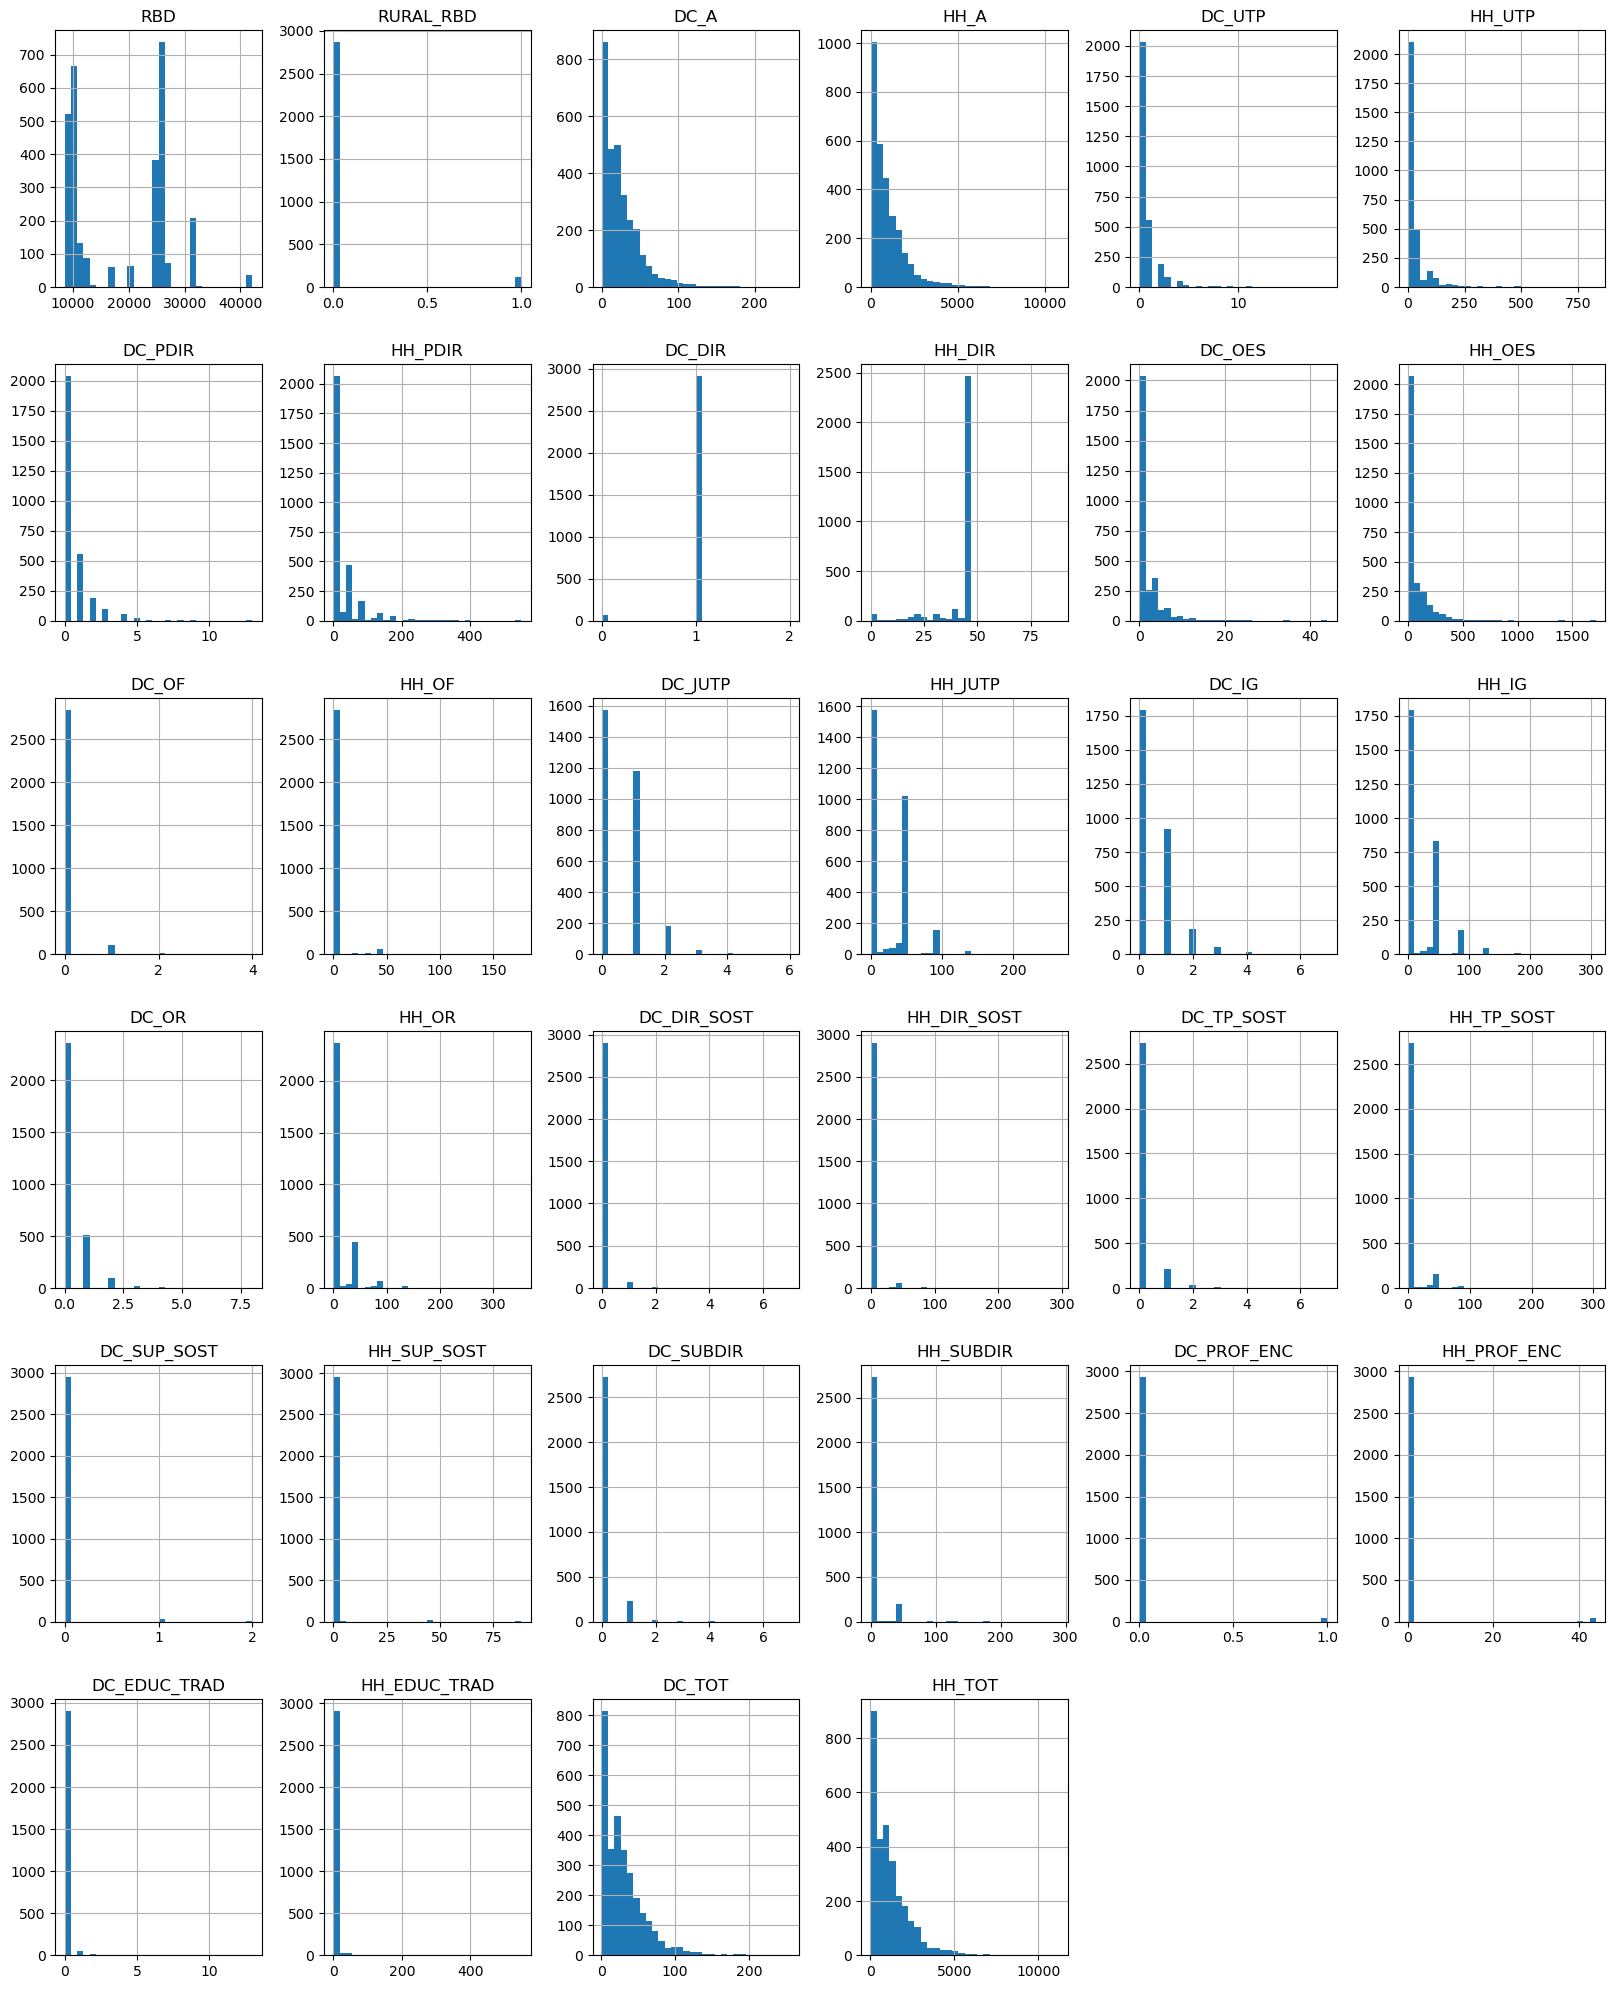

In [87]:
df_docentes.hist(bins=30, figsize=(20, 25))

<Axes: >

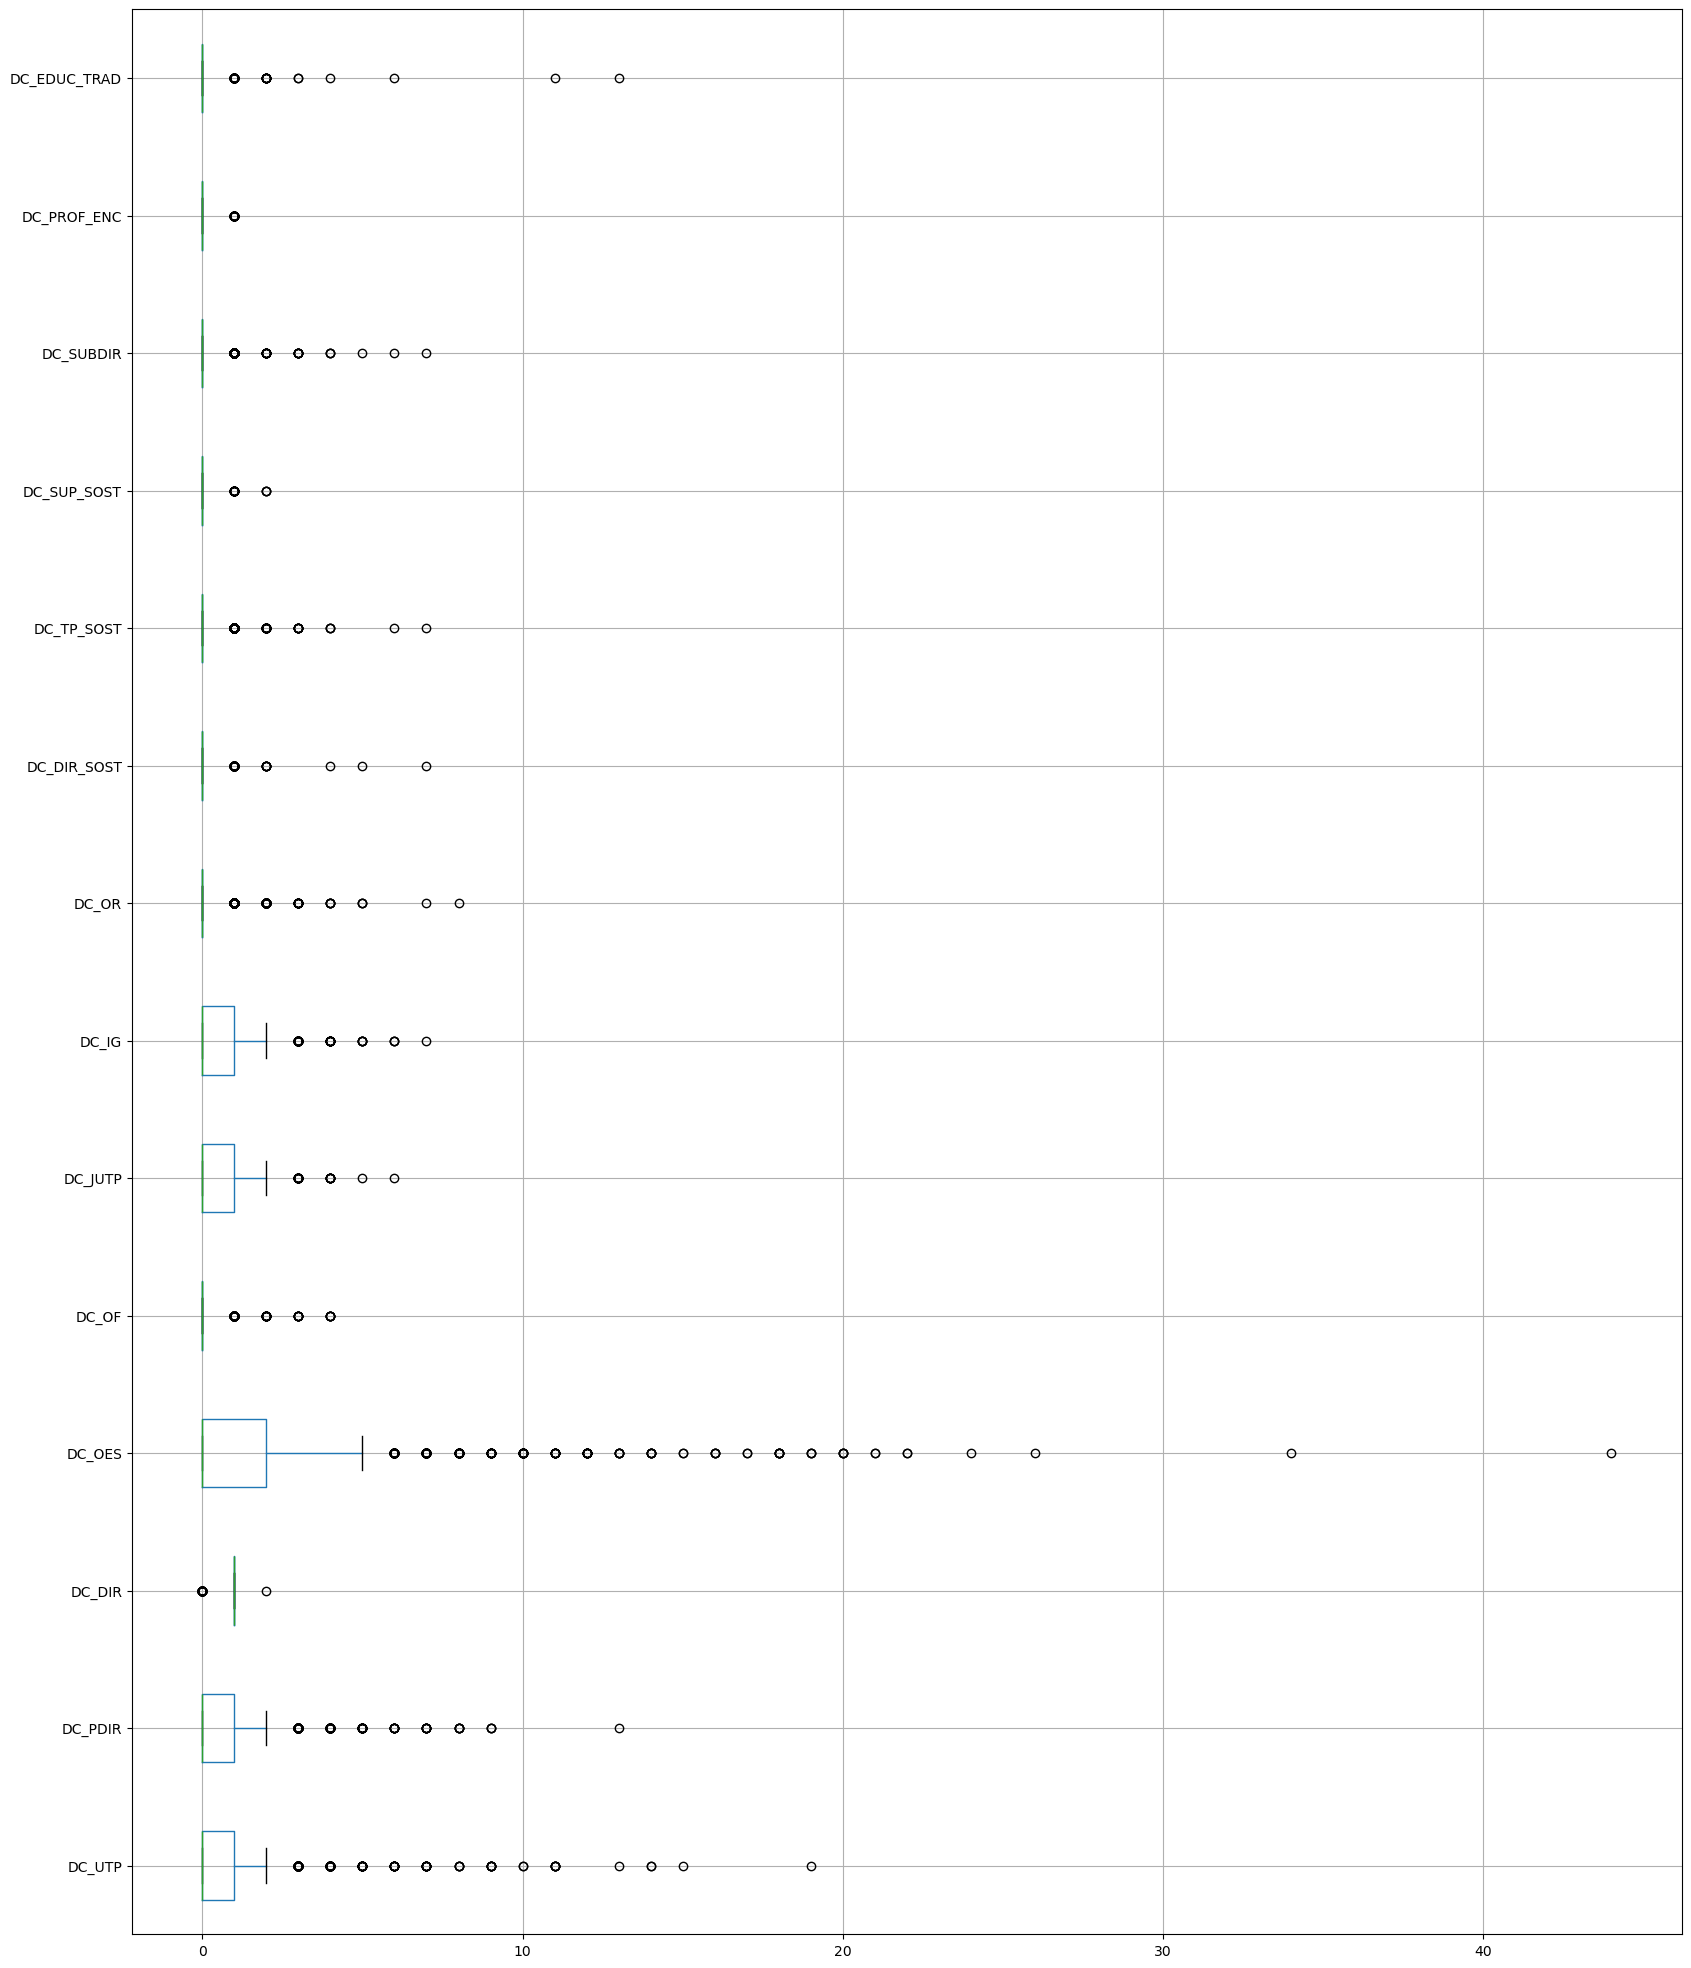

In [149]:

df_docentesplot = df_docentes.drop(columns = ['DC_TOT','DC_A','RBD','HH_TOT','HH_A','HH_EDUC_TRAD','HH_PROF_ENC','HH_SUBDIR','HH_SUP_SOST','HH_TP_SOST','HH_PDIR','HH_DIR','HH_OES','HH_DIR_SOST','HH_OR','HH_IG','HH_UTP','RURAL_RBD','HH_JUTP','HH_OF'])
df_docentesplot.boxplot(figsize=(20, 25), vert=False)

<Axes: >

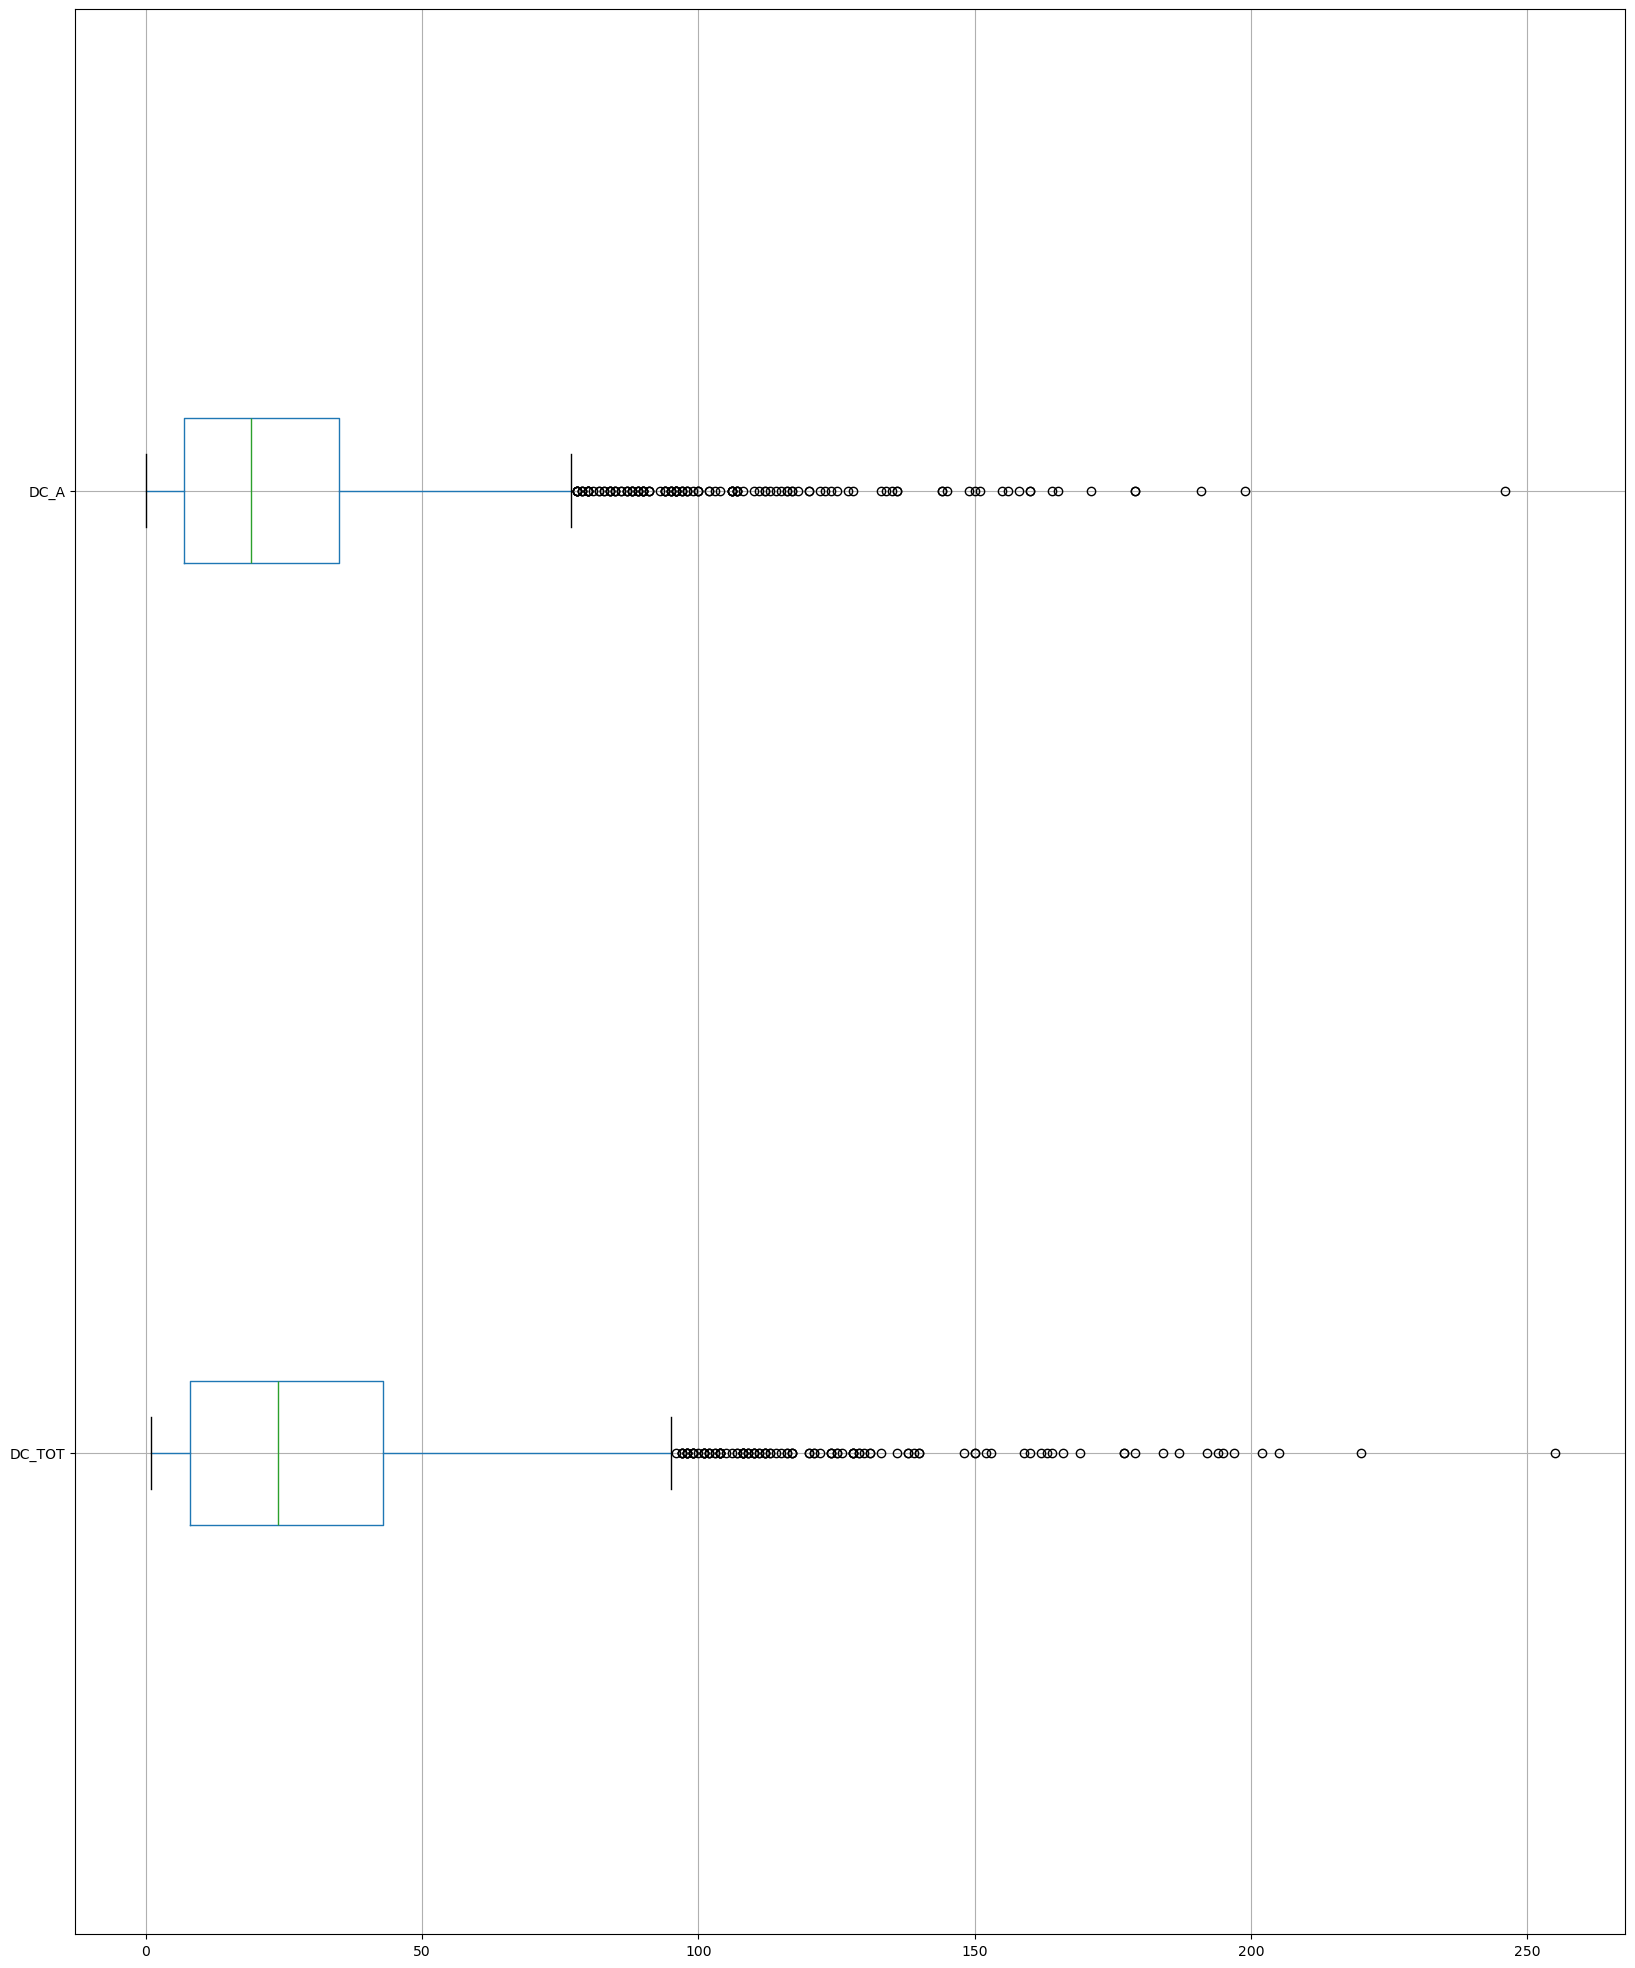

In [151]:
 df_docentes[['DC_TOT', 'DC_A']].boxplot(figsize=(20, 25), vert=False)

<Axes: >

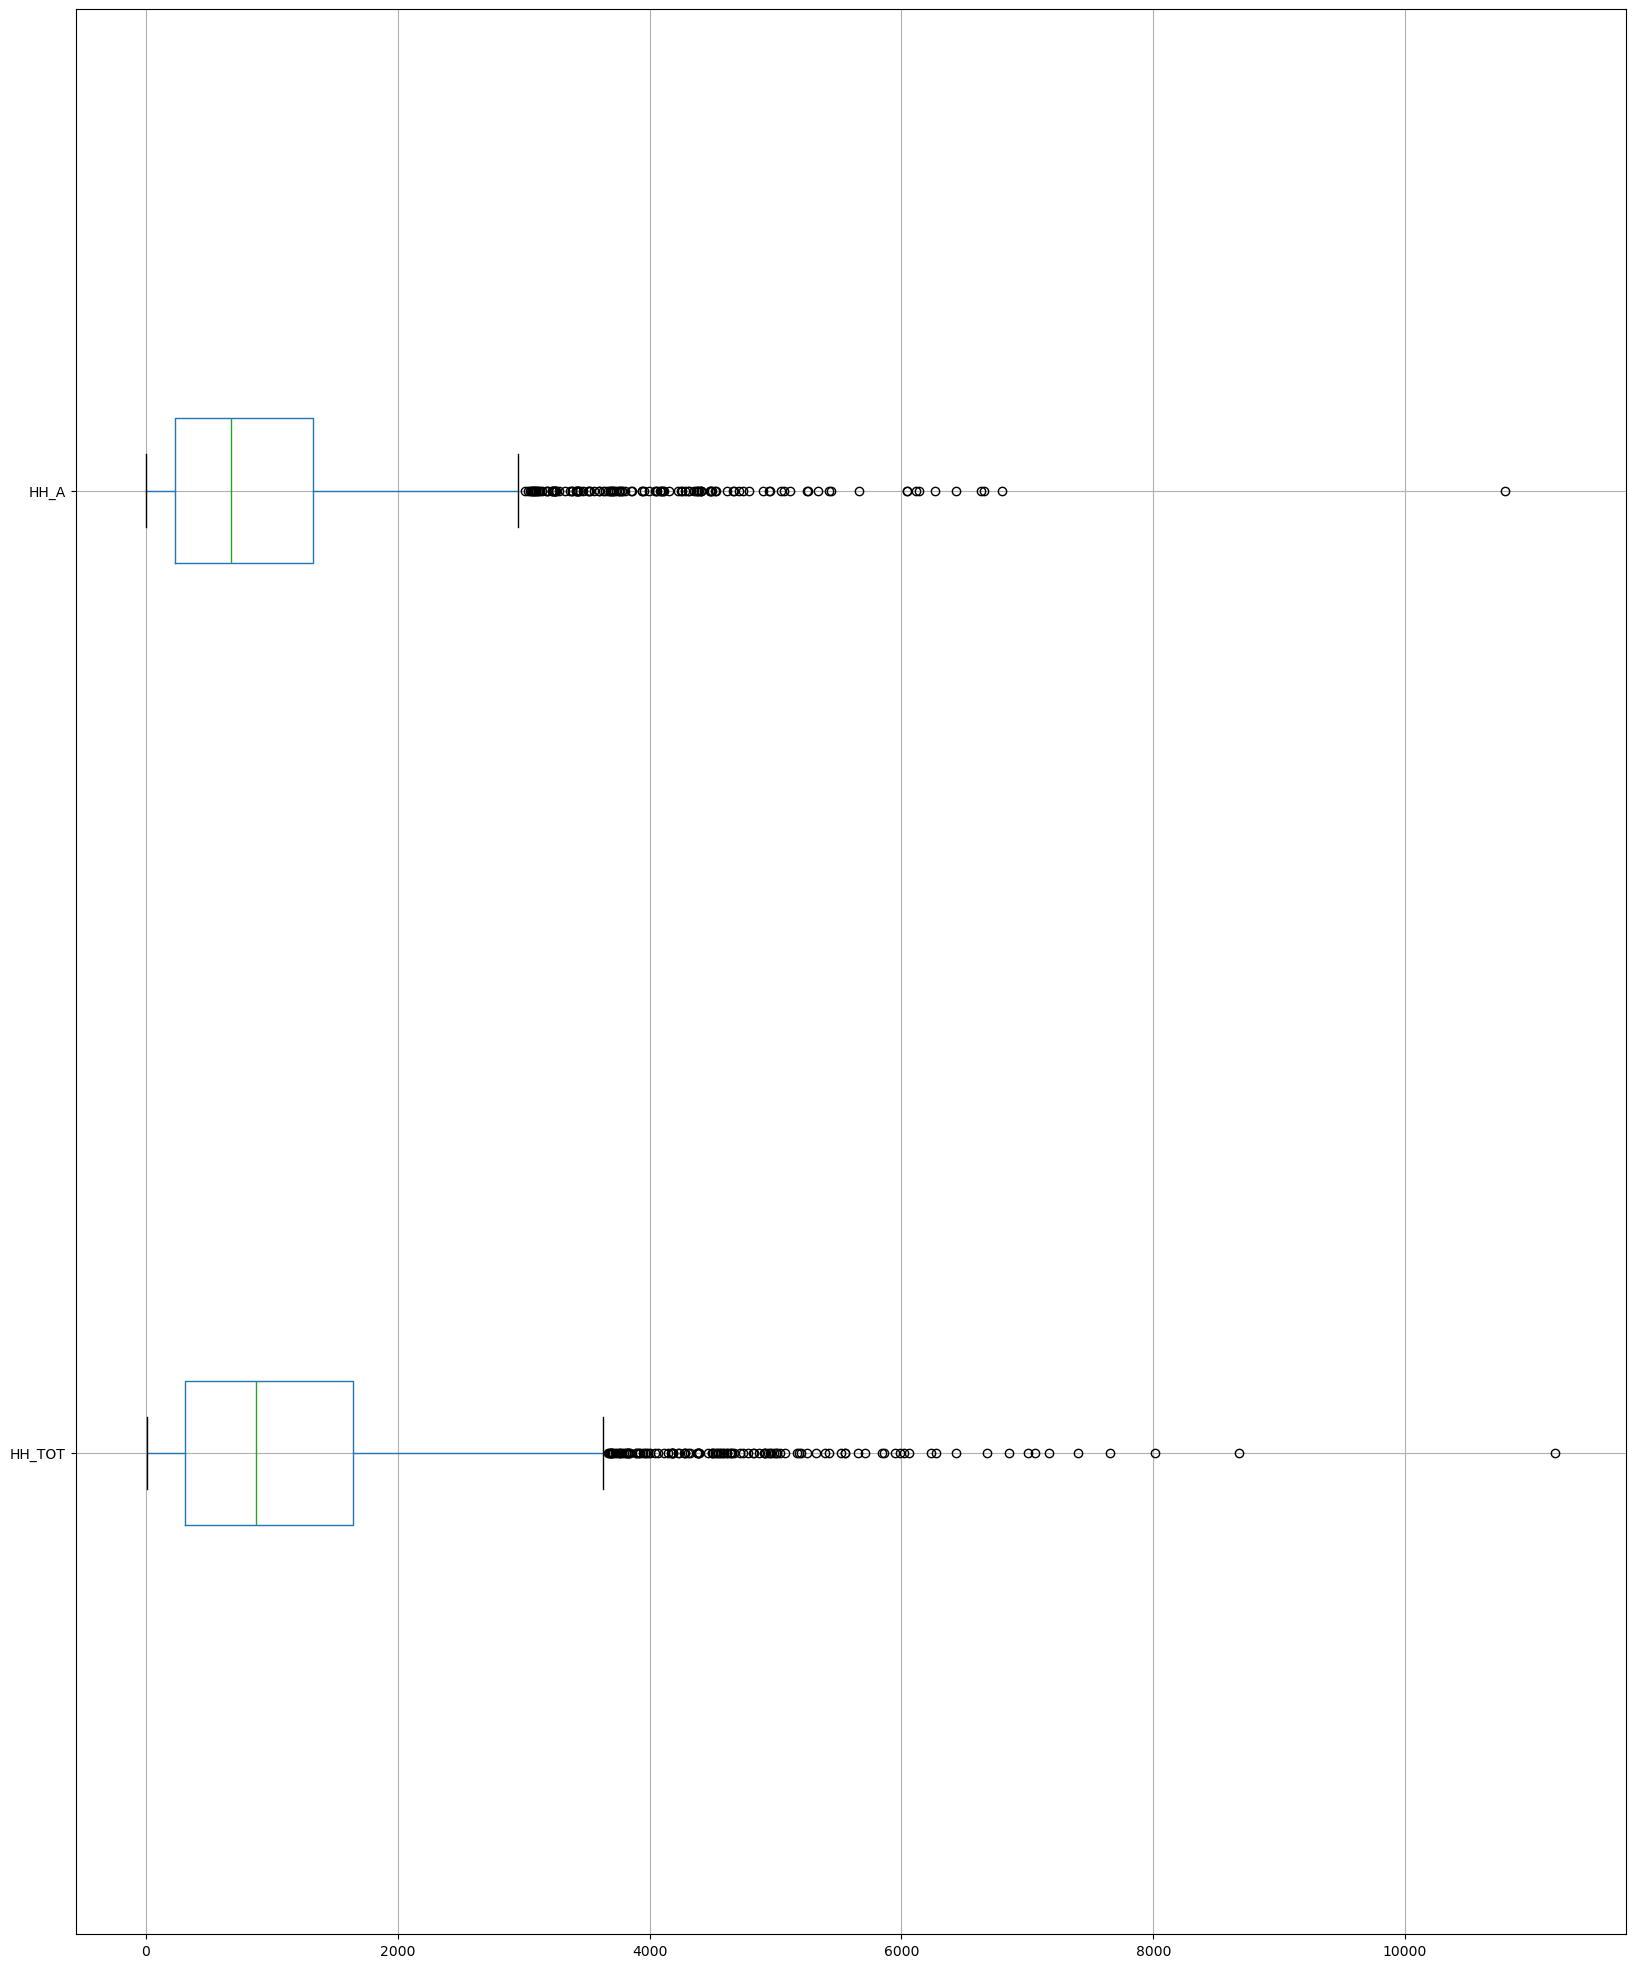

In [131]:
 df_docentes[['HH_TOT', 'HH_A']].boxplot(figsize=(20, 25), vert=False)

In [31]:
df_docentes.sort_values(by=['DC_A'],ascending=False)

,RBD,NOM_RBD,NOM_COM_RBD,RURAL_RBD,DC_A,HH_A,DC_UTP,HH_UTP,DC_PDIR,HH_PDIR,...,DC_SUP_SOST,HH_SUP_SOST,DC_SUBDIR,HH_SUBDIR,DC_PROF_ENC,HH_PROF_ENC,DC_EDUC_TRAD,HH_EDUC_TRAD,DC_TOT,HH_TOT
7368,9046,COLEGIO THE GRANGE SCHOOL,LA REINA,0,246,10796,0,0,6,264,...,0,0,1,44,0,0,0,0,255,11192
7280,8917,COLEGIO CRAIGHOUSE,LO BARNECHEA,0,199,6796,0,0,0,0,...,0,0,1,34,0,0,0,0,205,7002
7336,8995,COLEGIO SANTIAGO COLLEGE,LO BARNECHEA,0,191,6118,2,71,1,38,...,0,0,0,0,0,0,0,0,195,6271
7272,8906,COLEGIO SAINT GEORGE S COLLEGE,VITACURA,0,179,6140,5,220,5,208,...,0,0,0,0,0,0,0,0,202,7061
7284,8923,LYCÉE ANTOINE DE SAINT-EXUPÉRY,VITACURA,0,179,4519,0,0,4,112,...,0,0,0,0,0,0,0,0,184,4653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11508,16859,ESCUELA DE PARVULOS N° 201 `MIKY`,MELIPILLA,0,0,0,0,0,1,12,...,0,0,0,0,0,0,0,0,3,57
14992,26223,ESCUELA DE PARVULOS CAMILA BINFA,LA FLORIDA,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,10
14995,26226,ESCUELA DE PARV. ARMONIA,LA FLORIDA,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,30
16197,41308,JARDIN INFANTIL ARBOL DE LOS SUEÑOS,PADRE HURTADO,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,44


In [29]:
df = df_docentes.drop(columns = ['RBD', 'RURAL_RBD','NOM_RBD','NOM_COM_RBD'])
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (df< lower_bound) | (df> upper_bound)

outliers.sum()

DC_A            131
HH_A            125
DC_UTP          204
HH_UTP          187
DC_PDIR         200
HH_PDIR         184
DC_DIR           68
HH_DIR          513
DC_OES          240
HH_OES          242
DC_OF           140
HH_OF           140
DC_JUTP          40
HH_JUTP          39
DC_IG            75
HH_IG            74
DC_OR           625
HH_OR           625
DC_DIR_SOST      84
HH_DIR_SOST      84
DC_TP_SOST      251
HH_TP_SOST      251
DC_SUP_SOST      29
HH_SUP_SOST      29
DC_SUBDIR       253
HH_SUBDIR       253
DC_PROF_ENC      47
HH_PROF_ENC      47
DC_EDUC_TRAD     73
HH_EDUC_TRAD     73
DC_TOT          116
HH_TOT          118
dtype: int64

In [47]:
df_docentes.sort_values(by=['DC_A'], ascending=False).head(200)['NOM_COM_RBD'].value_counts()

NOM_COM_RBD
LAS CONDES             23
PUENTE ALTO            15
SANTIAGO               14
VITACURA               13
LO BARNECHEA           13
MAIPÚ                  13
COLINA                 11
PROVIDENCIA            10
QUILICURA               9
PEÑALOLÉN               8
ÑUÑOA                   7
LA FLORIDA              7
LA PINTANA              6
LA REINA                5
PUDAHUEL                4
HUECHURABA              3
SAN BERNARDO            3
BUIN                    3
RECOLETA                3
TALAGANTE               3
MELIPILLA               2
ESTACIÓN CENTRAL        2
LA GRANJA               2
SAN RAMÓN               2
ISLA DE MAIPO           2
LAMPA                   2
QUINTA NORMAL           2
PAINE                   1
CERRO NAVIA             1
MACUL                   1
PEÑAFLOR                1
PEDRO AGUIRRE CERDA     1
CERRILLOS               1
EL BOSQUE               1
INDEPENDENCIA           1
RENCA                   1
CALERA DE TANGO         1
SAN MIGUEL              1


In [ ]:

#hola

